In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [5]:
tf.__version__

'2.9.1'

In [6]:
train_data = ImageDataGenerator(
                 rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)
training_set = train_data.flow_from_directory(
                    r"C:\Users\Harish\Documents\MyML\Section 40 - Convolutional Neural Networks (CNN)\dataset\training_set",
                    target_size=(64,64),
                    batch_size=32,
                    class_mode='binary')

Found 8000 images belonging to 2 classes.


In [7]:
test_data =ImageDataGenerator(rescale=1./255)
test_set = test_data.flow_from_directory(r"C:\Users\Harish\Documents\MyML\Section 40 - Convolutional Neural Networks (CNN)\dataset\test_set",
                                        target_size=(64,64),
                                        batch_size=32,
                                        class_mode='binary')


Found 2000 images belonging to 2 classes.


In [88]:
from tensorflow.keras.layers import Conv2D , BatchNormalization,Dense ,Dropout,MaxPooling2D,Flatten,AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers,activations
from tensorflow.keras import models,layers

In [89]:
input_shape =(64,64,3)
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(activation='relu',filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(Conv2D(activation='relu',filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(activation='relu',filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(Conv2D(activation='relu',filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))



model.add(Flatten())

model.add(Dense(units = 1, activation = 'sigmoid'))

In [90]:
model.compile(optimizer= 'adam',loss= 'binary_crossentropy' ,metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_34 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_35 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                      

In [92]:
type(test_set)

keras.preprocessing.image.DirectoryIterator

In [93]:
history = model.fit(training_set ,validation_data=test_set, epochs =30)

Epoch 1/25
250/250 [==============================] - 20s 78ms/step - loss: 1.1151 - accuracy: 0.5975 - val_loss: 1.1355 - val_accuracy: 0.5095
Epoch 2/25
250/250 [==============================] - 19s 77ms/step - loss: 1.0066 - accuracy: 0.6189 - val_loss: 0.8312 - val_accuracy: 0.6325
Epoch 3/25
250/250 [==============================] - 20s 78ms/step - loss: 0.8755 - accuracy: 0.6461 - val_loss: 0.7568 - val_accuracy: 0.6705
Epoch 4/25
250/250 [==============================] - 19s 77ms/step - loss: 0.7755 - accuracy: 0.6735 - val_loss: 1.0147 - val_accuracy: 0.6280
Epoch 5/25
250/250 [==============================] - 19s 78ms/step - loss: 0.7368 - accuracy: 0.6982 - val_loss: 0.7581 - val_accuracy: 0.7395
Epoch 6/25
250/250 [==============================] - 19s 77ms/step - loss: 0.6681 - accuracy: 0.7113 - val_loss: 0.6738 - val_accuracy: 0.7285
Epoch 7/25
250/250 [==============================] - 19s 77ms/step - loss: 0.6482 - accuracy: 0.7269 - val_loss: 0.6369 - val_accuracy:

In [94]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array 
test_image = load_img(r"C:\Users\Harish\Documents\MyML\Section 40 - Convolutional Neural Networks (CNN)\dataset\single_prediction\egypt_kitty_social.webp", target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 63ms/step
dog


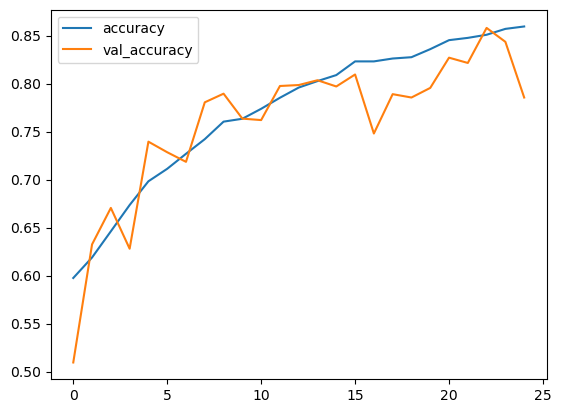

In [95]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label ='accuracy')
plt.plot(history.history['val_accuracy'] ,label ='val_accuracy')
plt.legend()
plt.show()

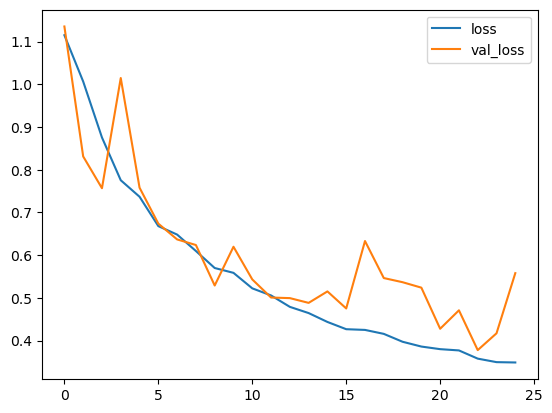

In [96]:
plt.plot(history.history['loss'],label ='loss')
plt.plot(history.history['val_loss'] ,label ='val_loss')
plt.legend()
plt.show()

In [34]:
model.save('cnn_model.h5')

In [8]:
from keras.models import load_model
loaded = load_model('cnn_model.h5')

In [9]:
loaded.evaluate(test_set,batch_size=64 ,verbose=1)

63/63 [==============================] - 17s 253ms/step - loss: 0.3804 - accuracy: 0.8605


[0.38037845492362976, 0.8604999780654907]

In [19]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array 
test_image = load_img(r"C:\Users\Harish\Documents\MyML\Section 40 - Convolutional Neural Networks (CNN)\dataset\single_prediction\images (1).jfif", target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 50ms/step
dog
